### Exploration of the data and general playing around with seaborn and matplotlib

### EDA on Elo Dataset

Elo, one of the largest payment brands in Brazil, has built partnerships with merchants in order to offer promotions or discounts to cardholders. The objective of the competition is to identify and serve the most relevant opportunities to individuals, by uncovering signal in customer loyalty.

- https://www.kaggle.com/c/elo-merchant-category-recommendation

Exploration of the data and general playing around with seaborn and matplotlib

In [4]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc
import os

In [9]:
print(os.listdir("data\\"))

['Data_Dictionary.xlsx', 'historical_transactions.csv', 'merchants.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


- train.csv - the training set
- test.csv - the test set
- sample_submission.csv - a sample submission file in the correct format - contains all card_ids you are expected to predict for.
- historical_transactions.csv - up to 3 months' worth of historical transactions for each card_id
- merchants.csv - additional information about all merchants / merchant_ids in the dataset.
- new_merchant_transactions.csv - two months' worth of data for each card_id containing ALL purchases that card_id made at merchant_ids that were not visited in the historical data.

In [10]:
train = pd.read_csv("data\\train.csv")

In [16]:
train.dtypes

first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
dtype: object

In [17]:
train = pd.read_csv("data\\train.csv",parse_dates=['first_active_month'])

In [21]:
print(train.dtypes)

first_active_month    datetime64[ns]
card_id                       object
feature_1                      int64
feature_2                      int64
feature_3                      int64
target                       float64
dtype: object


In [22]:
train.shape

(201917, 6)

In [24]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


- first_active_month : ''YYYY-MM', month of first purchase
- feature_1,2,3 : Anonymized card categorical feature
- target : Loyalty numerical score calculated 2 months after historical and evaluation period

In [52]:
test = pd.read_csv('data\\test.csv',parse_dates=['first_active_month'])
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


In [27]:
print(test.shape)


(123623, 5)

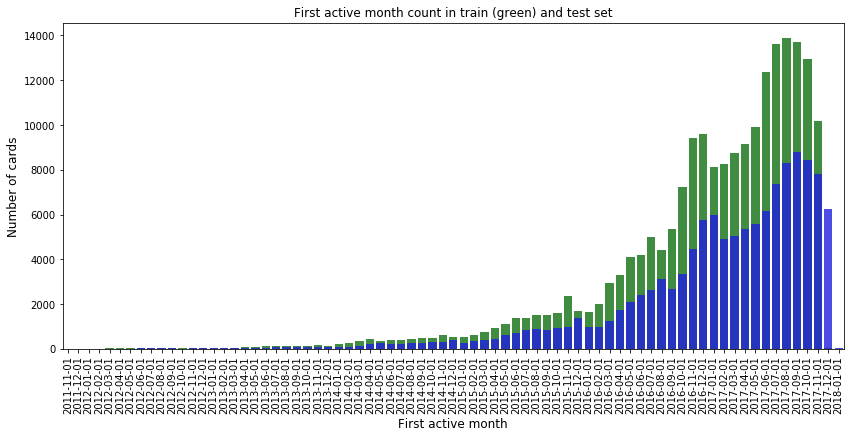

In [51]:
# Code in https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-elo
# SRK - Simple Exploration Notebook 

cnt_srs = train['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train (green) and test set")

cnt_srs = test['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='blue')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.show()

Look to have a similar distribution

In [53]:
train.corr()

,feature_1,feature_2,feature_3,target
feature_1,1.000000,-0.130969,0.583092,-0.014251
feature_2,-0.130969,1.000000,0.060925,-0.006242
feature_3,0.583092,0.060925,1.000000,-0.008125
target,-0.014251,-0.006242,-0.008125,1.000000


Low correlation between target and features.  feature_1 and feature_3 have corr of 0.58  

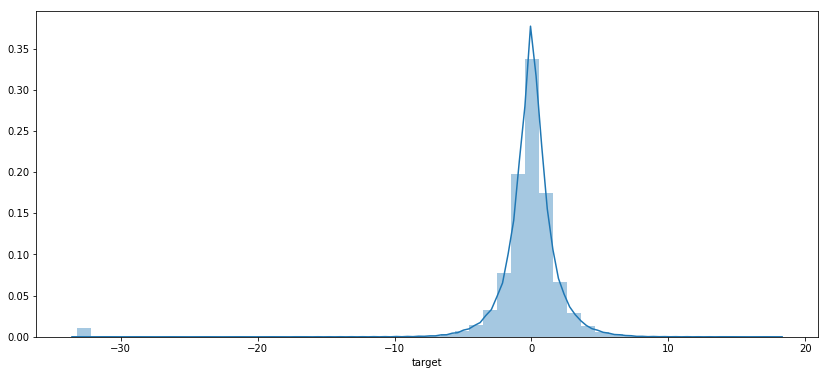

In [54]:
#histogram of target values
f,ax = plt.subplots(figsize=(14,6))
sns.distplot(train['target'])

In [55]:
train['target'].describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

Interesting outlier at min value. 

count    201917.000000
mean          3.105311
std           1.186160
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: feature_1, dtype: float64


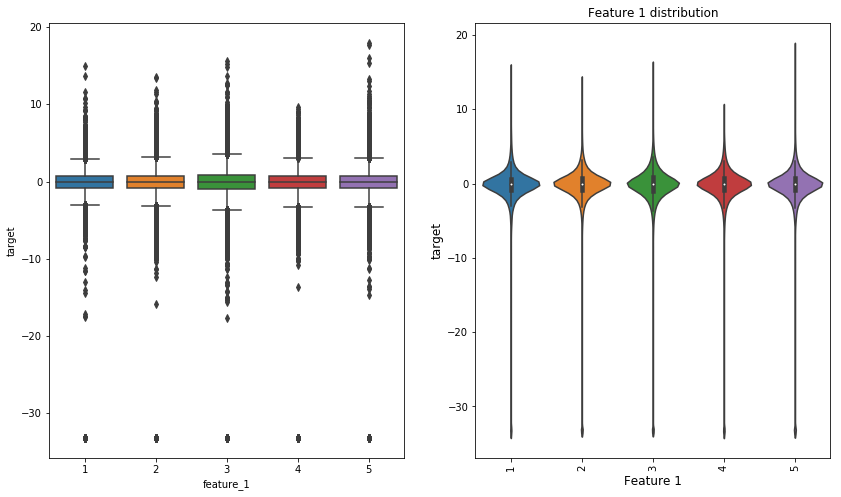

In [63]:
#Feature 1 and target
print(train['feature_1'].describe())

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_1']], axis=1)
fig = sns.boxplot(x='feature_1', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_1", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 1 distribution")
plt.show()

count    201917.000000
mean          1.745410
std           0.751362
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: feature_2, dtype: float64


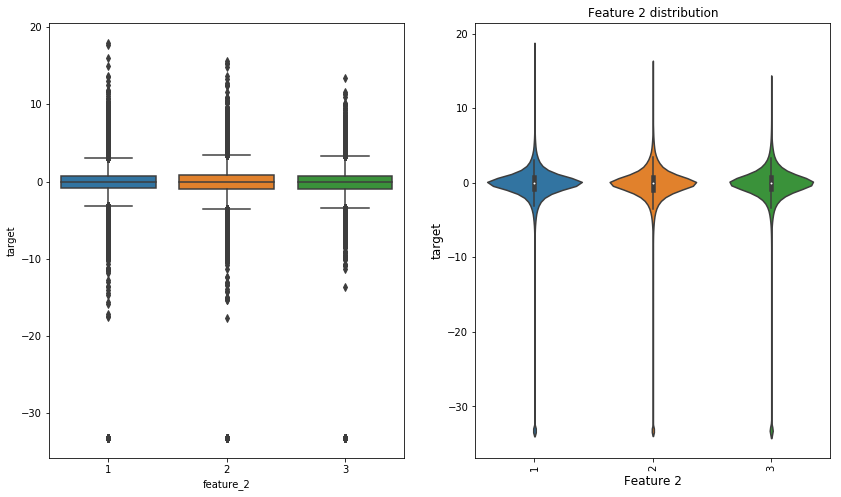

In [64]:
#Feature 2 and target
print(train['feature_2'].describe())

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_2']], axis=1)
fig = sns.boxplot(x='feature_2', y="target", data=data,ax=ax1)

# feature 2
sns.violinplot(x="feature_2", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('Feature 2', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("Feature 2 distribution")
plt.show()

count    201917.000000
mean          0.565569
std           0.495683
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: feature_3, dtype: float64


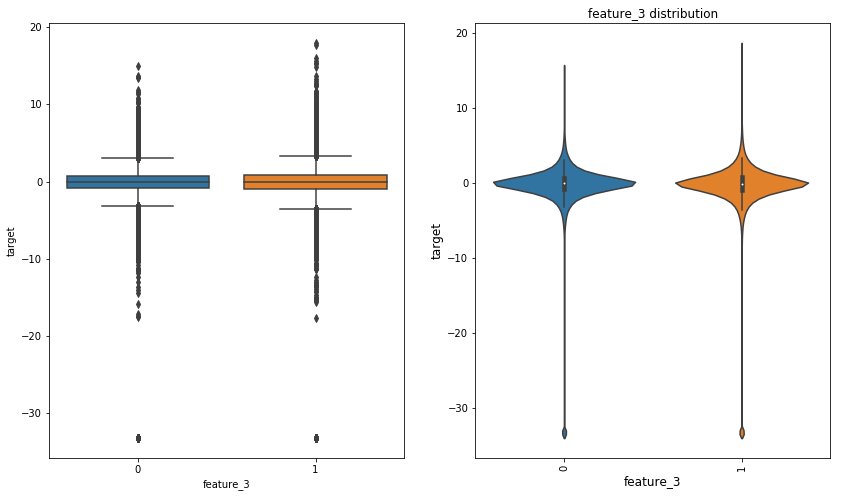

In [65]:
#Feature 3 and target
print(train['feature_3'].describe())

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

data = pd.concat([train['target'], train['feature_3']], axis=1)
fig = sns.boxplot(x='feature_3', y="target", data=data,ax=ax1)

# feature 1
sns.violinplot(x="feature_3", y="target", data=data,ax=ax2)
plt.xticks(rotation='vertical')
plt.xlabel('feature_3', fontsize=12)
plt.ylabel('target', fontsize=12)
plt.title("feature_3 distribution")
plt.show()

### Looking at relationship between feature_1 and feature_3

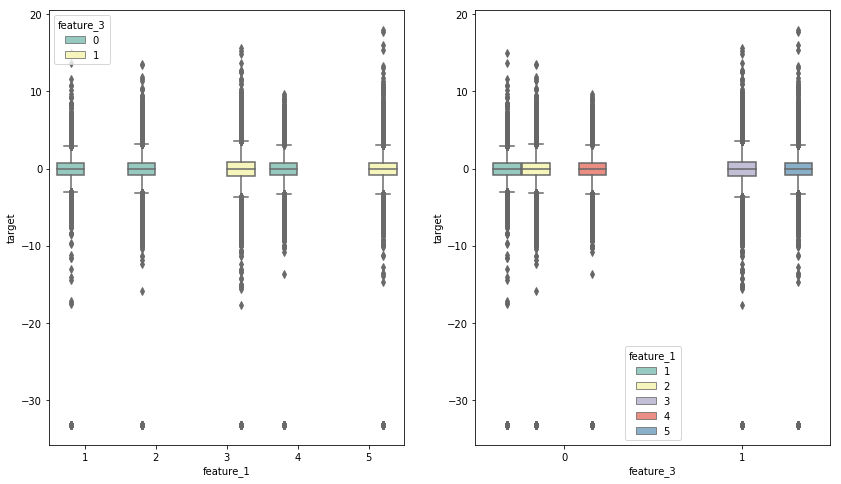

In [67]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_3",
               data=train, palette="Set3",ax=ax1);

sns.boxplot(x="feature_3", y="target", hue="feature_1",
               data=train, palette="Set3",ax=ax2);

In the left plot feature_1 ranges from 1 to 5, feature_3 ranges from 0 to 1.  In right plot feature_3 higher than 1 when feature_1 is 3 or 5

### Looking at relationship between feature_1 and feature_2

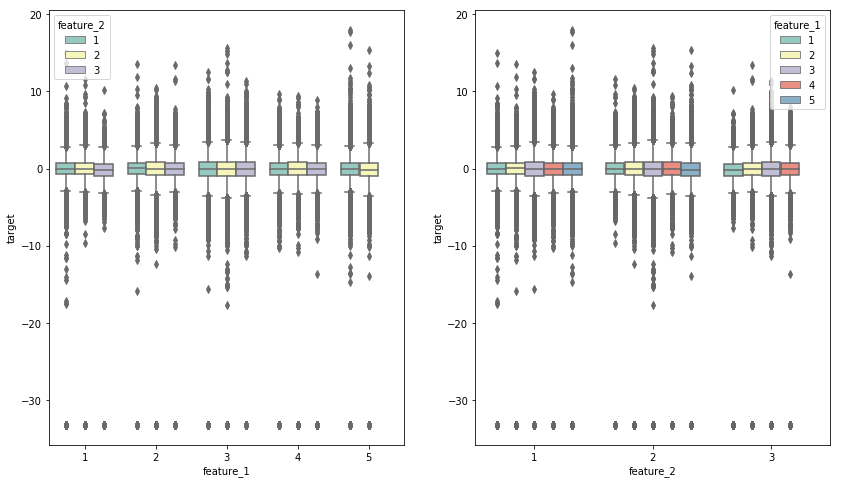

In [70]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,8))

sns.boxplot(x="feature_1", y="target", hue="feature_2",
               data=train, palette="Set3",ax=ax1);

sns.boxplot(x="feature_2", y="target", hue="feature_1",
               data=train, palette="Set3",ax=ax2);

From right plot, when feature_2 is 3 feature_1 is 4 or less 

In [73]:
train_low_m30 = train[train['target']<-30]
train_low_m30.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.219281


### Looking at -30 outlier

In [75]:
train_low_m30.describe()

,feature_1,feature_2,feature_3,target
count,2207.000000,2207.000000,2207.000000,2.207000e+03
mean,3.224286,1.782510,0.591300,-3.321928e+01
std,1.207783,0.810069,0.491705,7.107038e-15
min,1.000000,1.000000,0.000000,-3.321928e+01
25%,2.000000,1.000000,0.000000,-3.321928e+01
50%,3.000000,2.000000,1.000000,-3.321928e+01
75%,4.000000,2.000000,1.000000,-3.321928e+01
max,5.000000,3.000000,1.000000,-3.321928e+01


In [80]:
#what percentage are in this range
percent_minus_30 = train_low_m30['target'].count() / train['target'].count()
print(percent_minus_30*100)

1.0930233709890698


### Looking at missing values

In [93]:
#train.isnull().count()
total = train.isnull().sum()
percent = train.isnull().sum()/train.count()*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
first_active_month,0,0.0
card_id,0,0.0
feature_1,0,0.0
feature_2,0,0.0
feature_3,0,0.0


In [94]:
#train.isnull().count()
total = test.isnull().sum()
percent = test.isnull().sum()/test.count()*100
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data.head()

,Total,Percent
first_active_month,1,0.000809
card_id,0,0.000000
feature_1,0,0.000000
feature_2,0,0.000000
feature_3,0,0.000000


Very little missing data

### Looking at historical transactions

In [98]:
ht = pd.read_csv("data\\historical_transactions.csv")
print(ht.shape)

(29112361, 14)


In [99]:
ht.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [102]:
#will look to reduce the size by downcasting datatypes
ht.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [104]:
ht['month_lag'].describe()
#does it need to be float 64

count    2.911236e+07
mean    -4.487294e+00
std      3.588800e+00
min     -1.300000e+01
25%     -7.000000e+00
50%     -4.000000e+00
75%     -2.000000e+00
max      0.000000e+00
Name: month_lag, dtype: float64

In [105]:
ht.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


- card_id : Card identifier
- month_lag : month lag to reference date
- purchase_date : Purchase date
- authorized_flag : Y' if approved, 'N' if denied
- category_3 : anonymized category
- installments : number of installments of purchase
- category_1 : anonymized category
- merchant_category_id : Merchant category identifier
- subsector_id : Merchant category group identifier
- merchant_id : Merchant identifier 
- purchase_amount : Normalized purchase amount
- city_id : City identifier
- state_id : State identifier
- category_2 : anonymized category

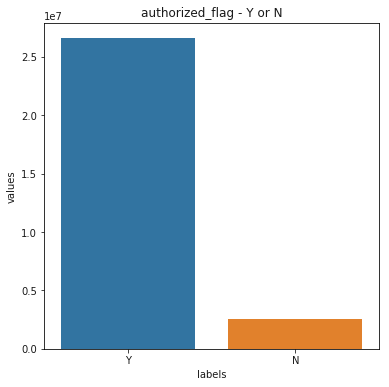

In [106]:
temp = ht["authorized_flag"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('authorized_flag - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

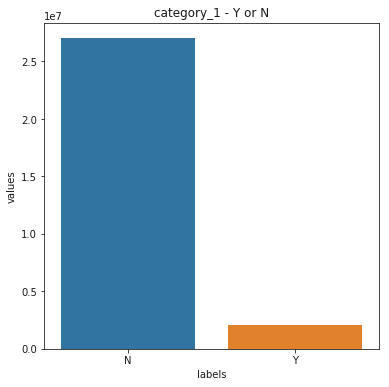

In [107]:
temp = ht["category_1"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_1 - Y or N')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

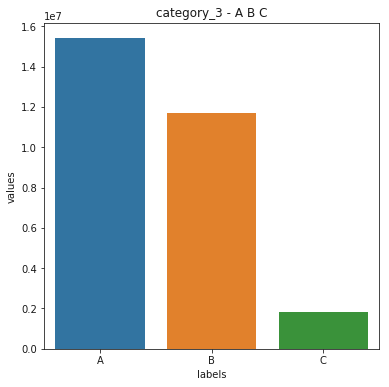

In [108]:
temp = ht["category_3"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_3 - A B C')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

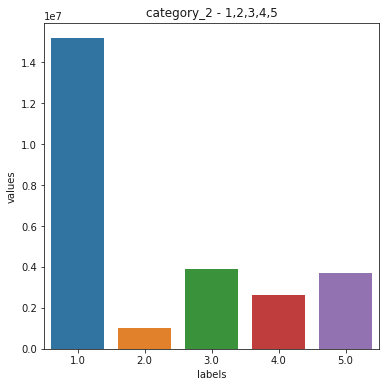

In [109]:
temp = ht["category_2"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('category_2 - 1,2,3,4,5')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

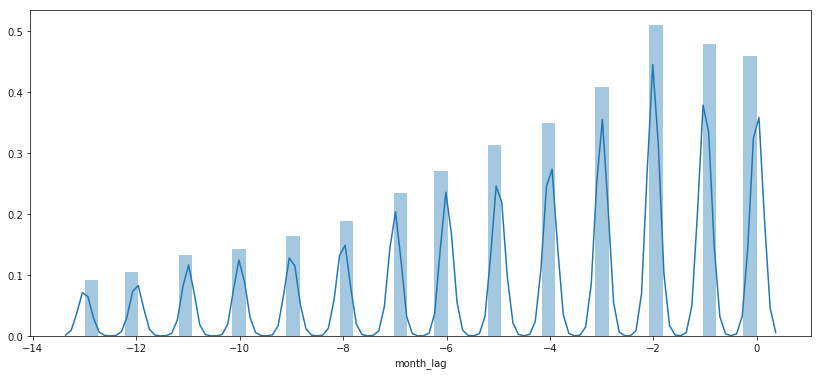

In [112]:
#histogram of month lag
f, ax = plt.subplots(figsize=(14, 6))
sns.distplot(ht['month_lag']);

In [114]:
#purchase amount
ht['purchase_amount'].describe()

count    2.911236e+07
mean     3.640090e-02
std      1.123522e+03
min     -7.469078e-01
25%     -7.203559e-01
50%     -6.883495e-01
75%     -6.032543e-01
max      6.010604e+06
Name: purchase_amount, dtype: float64

In [115]:
#installments
ht['installments'].describe()

count    2.911236e+07
mean     6.484954e-01
std      2.795577e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.990000e+02
Name: installments, dtype: float64

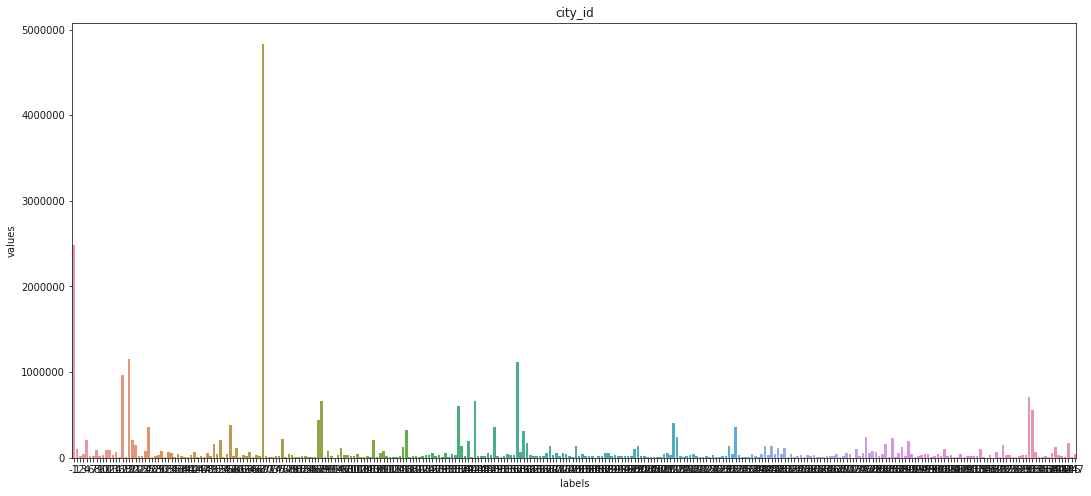

In [138]:
#make a dictionary of the values then convert into dataframe for easy plotting
temp = ht['city_id'].value_counts()
df = pd.DataFrame({'labels':temp.index,
                      'values':temp.values
                  })
plt.figure(figsize = (18,8))
plt.title('city_id')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()                    
                

In [142]:
#city 69 tends to dominate
print('city_id  count')
temp[:10]

city_id  count


 69     4835441
-1      2478624
 19     1151077
 158    1113013
 17      971714
 331     714414
 143     668769
 88      659328
 137     603023
 333     561144
Name: city_id, dtype: int64